<a href="https://colab.research.google.com/github/hussienfci/Data_Science/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 


In [ ]:
df = pd.read_csv('https://query.data.world/s/vng2kro5q6qgkixp6ojkprulqc7rhd')
df.columns , df.isna().sum()

(Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
        'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
       dtype='object'), pclass          1
 survived        1
 name            1
 sex             1
 age           264
 sibsp           1
 parch           1
 ticket          1
 fare            2
 cabin        1015
 embarked        3
 boat          824
 body         1189
 home.dest     565
 dtype: int64)

In [ ]:
df.columns , df.shape

(Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
        'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
       dtype='object'), (1310, 14))

## Drop Last row, as it has too much NAN

In [ ]:
df.drop(df.index[(1309)] , inplace = True)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


## Get titles of each passenger using name

In [ ]:
series = df['name'].apply(lambda x: x.split(', ')[1].split('. ')[0] if type(x) == str else x)
series 

0         Miss
1       Master
2         Miss
3           Mr
4          Mrs
         ...  
1304      Miss
1305      Miss
1306        Mr
1307        Mr
1308        Mr
Name: name, Length: 1309, dtype: object

### replace name column with title name, by droping name column, and inserting new column called title

In [ ]:
indx = df.columns.tolist().index('name')
df.insert(indx , 'title', series)
df = df.drop('name' , axis = 1 )
df

,pclass,survived,title,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,Miss,female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,Master,male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,Miss,female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,Mr,male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,Mrs,female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,Miss,female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,Miss,female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,Mr,male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,Mr,male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [ ]:
df['title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

### replace too much titles with specific titles

In [ ]:
df['title'] = df['title'].replace({
    'Ms':'Miss' , 
    'Col':'Colonel' , 
    'Dona': 'Mrs', 
    'Don':'Mr' , 
    'Capt':'Captian' , 
    'Mme':'Mrs' , 
    'Mlle' :'Miss' , 
    'Rev':'Reverand' , 
})
df

,pclass,survived,title,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,Miss,female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,Master,male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,Miss,female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,Mr,male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,Mrs,female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,Miss,female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,Miss,female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,Mr,male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,Mr,male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


## Make ticket column filled with bool only, if ticket contain, alphabets, it will be equal (1), else it will be equal (0).

In [ ]:
table = str.maketrans('' , '' , '0123456789/. ')
df['ticket'] = df['ticket'].apply(lambda x :int(bool(x.translate(table))))
df['ticket']

0       0
1       0
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: ticket, Length: 1309, dtype: int64

## Drop (NAN) from age column

In [ ]:
df.dropna(subset = ['age'] , inplace = True)
df.shape

(1046, 14)

In [ ]:
df

,pclass,survived,title,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,Miss,female,29.0000,0.0,0.0,0,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,Master,male,0.9167,1.0,2.0,0,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,Miss,female,2.0000,1.0,2.0,0,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,Mr,male,30.0000,1.0,2.0,0,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,Mrs,female,25.0000,1.0,2.0,0,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,3.0,0.0,Mr,male,45.5000,0.0,0.0,0,7.2250,NaN,C,NaN,312.0,NaN
1304,3.0,0.0,Miss,female,14.5000,1.0,0.0,0,14.4542,NaN,C,NaN,328.0,NaN
1306,3.0,0.0,Mr,male,26.5000,0.0,0.0,0,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,Mr,male,27.0000,0.0,0.0,0,7.2250,NaN,C,NaN,NaN,NaN


## Casting pclass, survived, sibsp, parch, and ticket columns with int8, to reduce memory

In [ ]:
df['pclass'].unique() , df['survived'].unique() , df['sibsp'].unique() , df['parch'].unique() , df['ticket'].unique()

(array([1., 2., 3.]),
 array([1., 0.]),
 array([0., 1., 2., 3., 4., 5., 8.]),
 array([0., 2., 1., 4., 3., 5., 6.]),
 array([0, 1]))

In [ ]:
df['pclass'], df['survived'] , df['sibsp'] , df['parch'] , df['ticket'] = df['pclass'].astype('int8') , df['survived'].astype('int8') , df['sibsp'].astype('int8') , df['parch'].astype('int8') ,df['ticket'].astype('int8')
df.dtypes

pclass          int8
survived        int8
title         object
sex           object
age          float64
sibsp           int8
parch           int8
ticket          int8
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1046 non-null   int8   
 1   survived   1046 non-null   int8   
 2   title      1046 non-null   object 
 3   sex        1046 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1046 non-null   int8   
 6   parch      1046 non-null   int8   
 7   ticket     1046 non-null   int8   
 8   fare       1045 non-null   float64
 9   cabin      272 non-null    object 
 10  embarked   1044 non-null   object 
 11  boat       417 non-null    object 
 12  body       120 non-null    float64
 13  home.dest  685 non-null    object 
dtypes: float64(3), int8(5), object(6)
memory usage: 86.8+ KB


## rename ticket column with new name, to know that it was including alphabets

In [ ]:
df.rename(columns={'ticket':'is_ticket_alphanumeric'} , inplace = True)
df

,pclass,survived,title,sex,age,sibsp,parch,is_ticket_alphanumeric,fare,cabin,embarked,boat,body,home.dest
0,1,1,Miss,female,29.0000,0,0,0,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,Master,male,0.9167,1,2,0,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,Miss,female,2.0000,1,2,0,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,Mr,male,30.0000,1,2,0,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,Mrs,female,25.0000,1,2,0,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,3,0,Mr,male,45.5000,0,0,0,7.2250,NaN,C,NaN,312.0,NaN
1304,3,0,Miss,female,14.5000,1,0,0,14.4542,NaN,C,NaN,328.0,NaN
1306,3,0,Mr,male,26.5000,0,0,0,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,Mr,male,27.0000,0,0,0,7.2250,NaN,C,NaN,NaN,NaN


### In this moment we can notice, that tickets with type alphanumeric do not indicate that the passenger will survive, so we don't need it in data, so we will drop it.

In [ ]:
filt = df['is_ticket_alphanumeric'] == 1 
df.loc[filt , 'survived'].mean()

0.4334470989761092

In [ ]:
filt = df['is_ticket_alphanumeric'] == 0 
df.loc[filt , 'survived'].mean()

0.398406374501992

In [ ]:
df.drop('is_ticket_alphanumeric' , axis = 1 , inplace = True)
df

,pclass,survived,title,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,home.dest
0,1,1,Miss,female,29.0000,0,0,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,Master,male,0.9167,1,2,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,Miss,female,2.0000,1,2,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,Mr,male,30.0000,1,2,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,Mrs,female,25.0000,1,2,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,3,0,Mr,male,45.5000,0,0,7.2250,NaN,C,NaN,312.0,NaN
1304,3,0,Miss,female,14.5000,1,0,14.4542,NaN,C,NaN,328.0,NaN
1306,3,0,Mr,male,26.5000,0,0,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,Mr,male,27.0000,0,0,7.2250,NaN,C,NaN,NaN,NaN


### We will work on cabin column, as it may help us to predict survived passengers, while using machine learning model

In [ ]:
df['cabin'].unique()

array(['B5', 'C22 C26', 'E12', 'D7', 'A36', 'C101', nan, 'C62 C64', 'B35',
       'A23', 'B58 B60', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99',
       'C52', 'T', 'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4',
       'E40', 'B38', 'E24', 'B51 B53 B55', 'B96 B98', 'C46', 'E31', 'E8',
       'B61', 'B77', 'A9', 'C89', 'E58', 'E49', 'E52', 'E45', 'B22',
       'B26', 'C85', 'E17', 'B71', 'B20', 'A34', 'C86', 'A16', 'A20',
       'A18', 'C54', 'C45', 'D20', 'A29', 'E25', 'C111', 'C23 C25 C27',
       'E36', 'D40', 'B39', 'B41', 'C123', 'E63', 'C130', 'B86', 'C92',
       'A5', 'C51', 'B42', 'C91', 'C125', 'D10 D12', 'B82 B84', 'E50',
       'D33', 'C83', 'B94', 'D49', 'B69', 'B11', 'C39', 'B18', 'D11',
       'C93', 'B28', 'C49', 'B52 B54 B56', 'E60', 'C132', 'B37', 'D21',
       'D19', 'D17', 'B101', 'D28', 'D6', 'D9', 'B80', 'C106', 'B79',
       'D30', 'C90', 'E46', 'E38', 'C78', 'C30', 'C118', 'D36', 'D48',
       'D47', 'C105', 'B36', 'B30', 'D43', 'C124', 'B24', 'C2', 'C

In [ ]:
df['cabin'].isna().sum()

774

###Note: 
Here we preprocess (cabin) column, to easily use it as effective (column), but unfortunately we found that there are (774) rows in (cabin) column with (NAN) value, so we will make a separted data file with (cabin) column categories as dummies, and another one without (cabin) column.
After all this we will evaluate each data file separately with macine learning model, and determine which one has greater accuracy.   

In [ ]:
table = str.maketrans('' , '' , '0123456789 ')
series = df['cabin'].apply(lambda x: x.translate(table) if type(x) == str else x)
series

0         B
1        CC
2        CC
3        CC
4        CC
       ... 
1301    NaN
1304    NaN
1306    NaN
1307    NaN
1308    NaN
Name: cabin, Length: 1046, dtype: object

In [ ]:
values = series.unique()
temp_lists = list(map(lambda x: list(set(x)) if type(x) == str else x , values))
decks = sorted({y for x in temp_lists if type(x) == list for y in x})
decks

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']

In [ ]:
series.dropna(inplace = True)

In [ ]:
temp_df = series.apply(lambda x : pd.Series([x.count(deck) if type(x) == str else x for deck in decks]))
temp_df.columns = [f'cabins_with_deck_#{x}' for x in decks]
temp_df

,cabins_with_deck_#A,cabins_with_deck_#B,cabins_with_deck_#C,cabins_with_deck_#D,cabins_with_deck_#E,cabins_with_deck_#F,cabins_with_deck_#G,cabins_with_deck_#T
0,0,1,0,0,0,0,0,0
1,0,0,2,0,0,0,0,0
2,0,0,2,0,0,0,0,0
3,0,0,2,0,0,0,0,0
4,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1188,0,0,0,0,0,0,1,0
1189,0,0,0,0,0,0,1,0
1217,0,0,0,0,0,1,1,0
1230,0,0,0,0,0,0,1,0


In [ ]:
df_with_cabins = df.dropna(subset=['cabin'])
df_with_cabins = pd.concat([df_with_cabins , temp_df] , axis = 1 )
df.drop('cabin' , axis = 1 , inplace = True)
df_with_cabins.drop('cabin' , axis = 1 , inplace = True)
df_with_cabins

,pclass,survived,title,sex,age,sibsp,parch,fare,embarked,boat,body,home.dest,cabins_with_deck_#A,cabins_with_deck_#B,cabins_with_deck_#C,cabins_with_deck_#D,cabins_with_deck_#E,cabins_with_deck_#F,cabins_with_deck_#G,cabins_with_deck_#T
0,1,1,Miss,female,29.0000,0,0,211.3375,S,2,NaN,"St Louis, MO",0,1,0,0,0,0,0,0
1,1,1,Master,male,0.9167,1,2,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON",0,0,2,0,0,0,0,0
2,1,0,Miss,female,2.0000,1,2,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,0,2,0,0,0,0,0
3,1,0,Mr,male,30.0000,1,2,151.5500,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,0,2,0,0,0,0,0
4,1,0,Mrs,female,25.0000,1,2,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,3,1,Mrs,female,24.0000,0,2,16.7000,S,13,NaN,NaN,0,0,0,0,0,0,1,0
1189,3,1,Miss,female,4.0000,1,1,16.7000,S,13,NaN,NaN,0,0,0,0,0,0,1,0
1217,3,0,Mr,male,19.0000,0,0,7.6500,S,NaN,NaN,NaN,0,0,0,0,0,1,1,0
1230,3,0,Miss,female,2.0000,0,1,10.4625,S,NaN,NaN,NaN,0,0,0,0,0,0,1,0


In [ ]:
df

,pclass,survived,title,sex,age,sibsp,parch,fare,embarked,boat,body,home.dest
0,1,1,Miss,female,29.0000,0,0,211.3375,S,2,NaN,"St Louis, MO"
1,1,1,Master,male,0.9167,1,2,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,Miss,female,2.0000,1,2,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,Mr,male,30.0000,1,2,151.5500,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,Mrs,female,25.0000,1,2,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...
1301,3,0,Mr,male,45.5000,0,0,7.2250,C,NaN,312.0,NaN
1304,3,0,Miss,female,14.5000,1,0,14.4542,C,NaN,328.0,NaN
1306,3,0,Mr,male,26.5000,0,0,7.2250,C,NaN,304.0,NaN
1307,3,0,Mr,male,27.0000,0,0,7.2250,C,NaN,NaN,NaN


## We will evaluate outliers of (fare) column.


> We see that outliers will help machine learning model to get best accuracy level, while using in data file, which is without (cabin) coulmn, so we remain it.



In [ ]:
q1 = df['fare'].quantile(0.25) 
q3 = df['fare'].quantile(0.75)
IQR = q3 - q1 
Upper_whisker = q3 + 1.5 * IQR
Lower_whisker = q1 - 1.5 * IQR
if Lower_whisker < 0 :
  Lower_whisker = 0 
Lower_filt = df['fare'] < Lower_whisker
Upper_filt = df['fare'] > Upper_whisker
total_filt = Lower_filt | Upper_filt
outlier_indicies = df[total_filt].index 
# df.drop(outlier_indicies , inplace = True)
df


,pclass,survived,title,sex,age,sibsp,parch,fare,embarked,boat,body,home.dest
0,1,1,Miss,female,29.0000,0,0,211.3375,S,2,NaN,"St Louis, MO"
1,1,1,Master,male,0.9167,1,2,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,Miss,female,2.0000,1,2,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,Mr,male,30.0000,1,2,151.5500,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,Mrs,female,25.0000,1,2,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...
1301,3,0,Mr,male,45.5000,0,0,7.2250,C,NaN,312.0,NaN
1304,3,0,Miss,female,14.5000,1,0,14.4542,C,NaN,328.0,NaN
1306,3,0,Mr,male,26.5000,0,0,7.2250,C,NaN,304.0,NaN
1307,3,0,Mr,male,27.0000,0,0,7.2250,C,NaN,NaN,NaN


We want to know passengers who use lifeboat, they did not survive.
We will drop them, because they may spoil machine learning model.
Note: All this will occur in data without (cabin) column

In [ ]:
df_no_boats = df['boat'].notna()
df_no_boat_survived = df['survived'] == 0 
filt = df_no_boats & df_no_boat_survived
df.drop(df[filt].index , inplace = True) 
df

,pclass,survived,title,sex,age,sibsp,parch,fare,embarked,boat,body,home.dest
0,1,1,Miss,female,29.0000,0,0,211.3375,S,2,NaN,"St Louis, MO"
1,1,1,Master,male,0.9167,1,2,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,Miss,female,2.0000,1,2,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,Mr,male,30.0000,1,2,151.5500,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,Mrs,female,25.0000,1,2,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...
1301,3,0,Mr,male,45.5000,0,0,7.2250,C,NaN,312.0,NaN
1304,3,0,Miss,female,14.5000,1,0,14.4542,C,NaN,328.0,NaN
1306,3,0,Mr,male,26.5000,0,0,7.2250,C,NaN,304.0,NaN
1307,3,0,Mr,male,27.0000,0,0,7.2250,C,NaN,NaN,NaN


work though data with cabin column

In [ ]:
df.drop(['boat' , 'body' , 'home.dest'] , axis = 1 , inplace = True )
df

,pclass,survived,title,sex,age,sibsp,parch,fare,embarked
0,1,1,Miss,female,29.0000,0,0,211.3375,S
1,1,1,Master,male,0.9167,1,2,151.5500,S
2,1,0,Miss,female,2.0000,1,2,151.5500,S
3,1,0,Mr,male,30.0000,1,2,151.5500,S
4,1,0,Mrs,female,25.0000,1,2,151.5500,S
...,...,...,...,...,...,...,...,...,...
1301,3,0,Mr,male,45.5000,0,0,7.2250,C
1304,3,0,Miss,female,14.5000,1,0,14.4542,C
1306,3,0,Mr,male,26.5000,0,0,7.2250,C
1307,3,0,Mr,male,27.0000,0,0,7.2250,C


In [ ]:
df_with_cabins_no_boat = df_with_cabins['boat'].isna()
df_with_cabins_no_boat_survived = df_with_cabins['survived'] == 1 
filt = df_with_cabins_no_boat & df_with_cabins_no_boat_survived
df_with_cabins.drop(df_with_cabins[filt].index , inplace = True)
df_with_cabins.drop(['boat' , 'body' , 'home.dest'] , axis = 1  , inplace  = True)
df_with_cabins

,pclass,survived,title,sex,age,sibsp,parch,fare,embarked,cabins_with_deck_#A,cabins_with_deck_#B,cabins_with_deck_#C,cabins_with_deck_#D,cabins_with_deck_#E,cabins_with_deck_#F,cabins_with_deck_#G,cabins_with_deck_#T
0,1,1,Miss,female,29.0000,0,0,211.3375,S,0,1,0,0,0,0,0,0
1,1,1,Master,male,0.9167,1,2,151.5500,S,0,0,2,0,0,0,0,0
2,1,0,Miss,female,2.0000,1,2,151.5500,S,0,0,2,0,0,0,0,0
3,1,0,Mr,male,30.0000,1,2,151.5500,S,0,0,2,0,0,0,0,0
4,1,0,Mrs,female,25.0000,1,2,151.5500,S,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,3,1,Mrs,female,24.0000,0,2,16.7000,S,0,0,0,0,0,0,1,0
1189,3,1,Miss,female,4.0000,1,1,16.7000,S,0,0,0,0,0,0,1,0
1217,3,0,Mr,male,19.0000,0,0,7.6500,S,0,0,0,0,0,1,1,0
1230,3,0,Miss,female,2.0000,0,1,10.4625,S,0,0,0,0,0,0,1,0


### Use one hot encoding through "title" column

In [ ]:
pd.options.display.max_columns = None
df = pd.get_dummies(data =df , columns= ['title'])
df

,pclass,survived,sex,age,sibsp,parch,fare,embarked,title_Captian,title_Colonel,title_Dr,title_Jonkheer,title_Lady,title_Major,title_Master,title_Miss,title_Mr,title_Mrs,title_Reverand,title_Sir,title_the Countess
0,1,1,female,29.0000,0,0,211.3375,S,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,1,male,0.9167,1,2,151.5500,S,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,female,2.0000,1,2,151.5500,S,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,male,30.0000,1,2,151.5500,S,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,female,25.0000,1,2,151.5500,S,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,3,0,male,45.5000,0,0,7.2250,C,0,0,0,0,0,0,0,0,1,0,0,0,0
1304,3,0,female,14.5000,1,0,14.4542,C,0,0,0,0,0,0,0,1,0,0,0,0,0
1306,3,0,male,26.5000,0,0,7.2250,C,0,0,0,0,0,0,0,0,1,0,0,0,0
1307,3,0,male,27.0000,0,0,7.2250,C,0,0,0,0,0,0,0,0,1,0,0,0,0


### Use one hot encoding through "sex & embarked" columns

In [ ]:
df = pd.get_dummies(data = df ,  columns=['sex'  , 'embarked'] , drop_first= True)
df

,pclass,survived,age,sibsp,parch,fare,title_Captian,title_Colonel,title_Dr,title_Jonkheer,title_Lady,title_Major,title_Master,title_Miss,title_Mr,title_Mrs,title_Reverand,title_Sir,title_the Countess,sex_male,embarked_Q,embarked_S
0,1,1,29.0000,0,0,211.3375,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,1,1,0.9167,1,2,151.5500,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
2,1,0,2.0000,1,2,151.5500,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,1,0,30.0000,1,2,151.5500,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
4,1,0,25.0000,1,2,151.5500,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,3,0,45.5000,0,0,7.2250,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1304,3,0,14.5000,1,0,14.4542,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1306,3,0,26.5000,0,0,7.2250,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1307,3,0,27.0000,0,0,7.2250,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


### Do same operations with data with "cabin" columns

In [ ]:
df_with_cabins = pd.get_dummies(data = df_with_cabins , columns= ['title'])
df_with_cabins = pd.get_dummies(data = df_with_cabins , columns= ['sex' , 'embarked'] , drop_first= True)
df_with_cabins

,pclass,survived,age,sibsp,parch,fare,cabins_with_deck_#A,cabins_with_deck_#B,cabins_with_deck_#C,cabins_with_deck_#D,cabins_with_deck_#E,cabins_with_deck_#F,cabins_with_deck_#G,cabins_with_deck_#T,title_Captian,title_Colonel,title_Dr,title_Lady,title_Major,title_Master,title_Miss,title_Mr,title_Mrs,title_Sir,title_the Countess,sex_male,embarked_Q,embarked_S
0,1,1,29.0000,0,0,211.3375,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,1,0.9167,1,2,151.5500,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
2,1,0,2.0000,1,2,151.5500,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,1,0,30.0000,1,2,151.5500,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,1,0,25.0000,1,2,151.5500,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,3,1,24.0000,0,2,16.7000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1189,3,1,4.0000,1,1,16.7000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1217,3,0,19.0000,0,0,7.6500,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1230,3,0,2.0000,0,1,10.4625,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
temp_filt = df[['pclass' , 'sibsp' , 'parch']] == [3 , 0 , 0]
filt = temp_filt.all(axis = 1)
temp_df = df[filt]
df.loc[1225 , 'fare'] = temp_df['fare'].median()
df['fare'].isna().sum()

0

## Machine learning models

**Spliting data**

In [ ]:
X = df.drop('survived', axis = 1 ).values
y = df['survived'].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X_train, X_test , y_train , y_test = train_test_split(X, y , test_size = 0.20)

### Make pipline containing scaler and the machine learning model

In [ ]:
from sklearn.pipeline import make_pipeline
scal = StandardScaler()
knn = KNeighborsClassifier(metric = 'manhattan' , n_neighbors= 11 )
pipline = make_pipeline(scal , knn)
pipline.fit(X_train , y_train)
y_predict = pipline.predict(X_test) 
print(accuracy_score(y_test , y_predict))

0.8221153846153846


In [ ]:
X = df_with_cabins.drop('survived',axis = 1 )
y= df_with_cabins['survived']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20 )
pipline = make_pipeline(scal,knn )
pipline.fit(X_train , y_train)
y_predict = pipline.predict(X_test)
print(accuracy_score(y_test , y_predict))

0.7272727272727273


***Here we shuffle data to randomize data points, then use cross-validation to avoid randome spliting of data***

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score

col = df.columns
arr = df.values

np.random.shuffle(arr)
df = pd.DataFrame(arr, columns= col)

X = df.drop('survived' , axis = 1).values
y = df['survived'].values


cros_val_acc = cross_val_score(
    estimator=pipline,
    X = X , 
    y=y,
    scoring = 'accuracy' , 
    cv = 5 , 
)
(cros_val_acc.mean())

0.8056066518023041

In [ ]:
col = df_with_cabins.columns
arr = df_with_cabins.values 

np.random.shuffle(arr)

df_with_cabins = pd.DataFrame(arr , columns = col)


X = df_with_cabins.drop('survived', axis=1)
y = df_with_cabins['survived'].values
knn = KNeighborsClassifier(n_neighbors= 15 , metric = 'manhattan')
pipline = make_pipeline(scal , knn)

cros_val_acc= cross_val_score(
    estimator= pipline , 
    X = X , 
    y = y , 
    scoring = 'accuracy'  , 
    cv = 5 ,
)
cros_val_acc.mean()

0.7637037037037038

In [ ]:
from sklearn.naive_bayes import GaussianNB

col = df.columns
arr = df.values

np.random.shuffle(arr)

df = pd.DataFrame(arr , columns= col )

X = df.drop('survived' , axis = 1 ).values
y = df['survived'].values

NB = GaussianNB()

cross_val_acc = cross_val_score(
    estimator = NB , 
    X = X , 
    y = y , 
    scoring = 'accuracy',
    cv = 5
)
cros_val_acc.mean()

0.7637037037037038

In [ ]:
col = df_with_cabins.columns 
arr = df_with_cabins.values 

np.random.shuffle(arr)

df_with_cabins = pd.DataFrame(arr , columns= col )

X = df_with_cabins.drop('survived' , axis = 1 ).values 
y = df_with_cabins['survived'].values 

NB = GaussianNB()

cros_val_acc = cross_val_score(
    estimator= NB , 
    X = X , y = y , 
    scoring = 'accuracy' , 
    cv = 5
)
cros_val_acc.mean()

0.7489562289562289

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score , cross_val_predict

df = df.sample(frac = 1.0 , replace = False)

X = df.drop('survived' , axis = 1).values
y = df['survived'].values
scaler = StandardScaler()
logreg = LogisticRegression(solver = 'saga' ,tol=1e-4, max_iter= 1_000_000 , penalty = 'elasticnet' ,class_weight= 'balanced', l1_ratio = 0.2 )

pipline = make_pipeline(scaler, logreg)

cross_val_acc = cross_val_score(estimator = pipline , X = X , y = y , scoring = 'accuracy' , cv = 5 )

cross_val_acc.mean()


0.8055787811222593

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.3, random_state = 0  )

scaler = StandardScaler()
logreg = LogisticRegression(solver = 'saga' ,tol=1e-4, max_iter= 1_000_000 , penalty = 'elasticnet' ,class_weight= 'balanced', l1_ratio = 0.2  , random_state= 0 )

pipline = make_pipeline(scaler, logreg)

pipline.fit(X_train , y_train)
y_predict = pipline.predict(X_test) 

accuracy_score(y_predict , y_test)

0.7916666666666666

## **Confusion Matrix**

Text(33.0, 0.5, 'Actual')

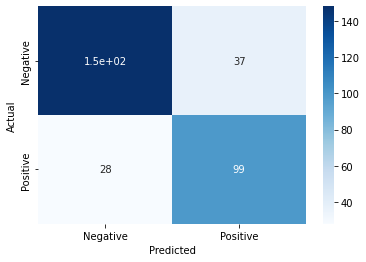

In [ ]:
import seaborn as sns 

conf_matrix = confusion_matrix(y_test , y_predict)
conf = pd.DataFrame(conf_matrix , index = ['Negative','Positive'] , columns=['Negative' , 'Positive'] , )
ax = sns.heatmap(annot= True , data = conf , cmap = 'Blues')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

In [ ]:
import seaborn as sns 

conf = pd.DataFrame([['TN' , 'FP']
                     ,['FN', 'TP']] ,
                     index = ['Negative','Positive'] ,
                     columns=['Negative' , 'Positive'])
# sns.heatmap(annot= True , data = conf , cmap = 'Blues')
conf

,Negative,Positive
Negative,TN,FP
Positive,FN,TP


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, fbeta_score, recall_score  , precision_score

print(f'Accuracy score: {round(100*accuracy_score(y_test , y_predict) , 2 )}%')
print(f'Recall score: {round(100*recall_score(y_test , y_predict), 2)}%')
print(f'F_Beta score at beta = 0.5 : {round(100*fbeta_score(y_test , y_predict , beta=0.5) , 2)}%')
print(f'F_Beta score at beta = 2 : {round(100*fbeta_score(y_test , y_predict , beta=2) , 2)}%')
print(f'precision score : {round(100*precision_score(y_true=y_test , y_pred= y_predict) , 2 )}%')

Accuracy score: 79.17%
Recall score: 77.95%
F_Beta score at beta = 0.5 : 73.77%
F_Beta score at beta = 2 : 76.86%
precision score : 72.79%


In [ ]:
from sklearn.tree import DecisionTreeClassifier
X = df.drop('survived' , axis = 1 )
y = df['survived']
X_train , X_test , y_train, y_test = train_test_split(X , y , test_size=0.2)
DecisionTree = DecisionTreeClassifier(random_state = 0  ,
                                      criterion='entropy' ,
                                      splitter = 'best' , 
                                      max_depth= None ,
                                      min_samples_split=3  ,
                                      min_samples_leaf=1 ,
                                      max_features=None,
                                      max_leaf_nodes=150 ,
                                      class_weight='balanced',
                                      
                                      )
DecisionTree.fit(X_train , y_train)
DecisionTree.score(X_train , y_train,) , DecisionTree.score(X_test , y_test,)


(0.9470517448856799, 0.7788461538461539)

In [ ]:
DecisionTree.get_depth()

16

In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import graphviz
from sklearn.tree import export_graphviz
import pydotplus
import collections
features_names =['pclass', 'age', 'sibsp', 'parch', 'fare', 'title_Captian',
       'title_Colonel', 'title_Dr', 'title_Jonkheer', 'title_Lady',
       'title_Major', 'title_Master', 'title_Miss', 'title_Mr', 'title_Mrs',
       'title_Reverand', 'title_Sir', 'title_the Countess', 'sex_male',
       'embarked_Q', 'embarked_S'] 
# df.columns

# export_graphviz(DecisionTree , outfill = '')

In [ ]:
dot_data = export_graphviz(DecisionTree , 
                           feature_names = features_names,
                           )

In [ ]:
dot_data = export_graphviz(DecisionTree,
                                feature_names=features_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = graphviz.Source(dot_data)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))
print(edges) 

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')

In [ ]:
values = DecisionTree.feature_importances_
keys = DecisionTree.feature_names_in_
series = pd.Series(values , index = keys).sort_values(ascending = False)
series

fare                  0.304795
title_Mr              0.240263
age                   0.240015
pclass                0.114285
title_Reverand        0.022784
parch                 0.019556
sibsp                 0.018168
embarked_Q            0.012195
embarked_S            0.008761
sex_male              0.008693
title_Master          0.005381
title_Mrs             0.005103
title_Lady            0.000000
title_Jonkheer        0.000000
title_Miss            0.000000
title_Dr              0.000000
title_Colonel         0.000000
title_Sir             0.000000
title_the Countess    0.000000
title_Captian         0.000000
title_Major           0.000000
dtype: float64

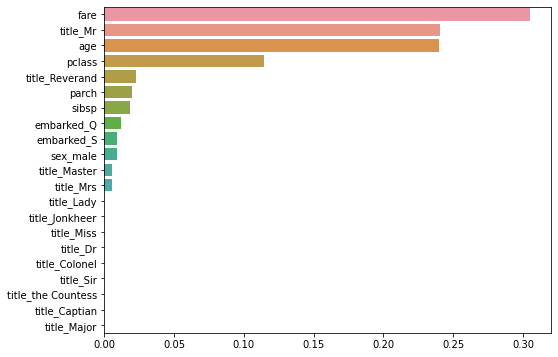

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8 , 6))
sns.barplot(x = series, y = series.index)

In [ ]:
from sklearn.ensemble import BaggingClassifier

base_model = DecisionTreeClassifier(
                                    class_weight='balanced' ,
                                    random_state = 0 , 
                                    splitter = 'best' , 
                                    criterion = 'entropy' ,
                                    max_features='sqrt' , max_leaf_nodes=150)
Bagging = BaggingClassifier(
                          base_estimator= base_model , 
                          n_estimators = 1000, 
                          max_samples = 1.0 , 
                          max_features = 1.0 , 
                          bootstrap_features= True , 
                          bootstrap= True ,random_state = 0  , oob_score = True)
Bagging.fit(X_train , y_train)
Bagging.score(X_test , y_test)

0.8461538461538461

In [ ]:

Bagging = BaggingClassifier(
                          base_estimator= base_model , 
                          n_estimators = 1000, 
                          max_samples = 0.8 , 
                          max_features = 1.0 , 
                          bootstrap_features= True , 
                          bootstrap= True ,random_state = 0  , oob_score = True)
Bagging.fit(X , y )
Bagging.oob_score_

0.8152069297401348

In [ ]:
from scipy.sparse.construct import random
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier

RandomForest = RandomForestClassifier(
    random_state= 0 , 
    max_features='log2' , 
    bootstrap= True , 
    oob_score= True , 
    max_samples=0.94 , 
    max_leaf_nodes=150,

    n_estimators= 1000 , 
    )
RandomForest.fit(X ,  y )
RandomForest.oob_score_

0.8007699711260827

In [ ]:
ExtraTree = ExtraTreesClassifier(
    random_state= None , 
    max_features= 'sqrt' , 
    max_leaf_nodes=150 ,
    bootstrap = True , 
    oob_score = True , 
    n_estimators=1000)
ExtraTree.fit(X , y )
ExtraTree.oob_score_

0.8123195380173244

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate
base_model = DecisionTreeClassifier(max_depth = 1 , criterion = 'entropy' , class_weight='balanced')
Ada_Boost = AdaBoostClassifier(base_estimator= base_model , 
                               n_estimators = 50 , learning_rate = 0.1)
cross_val_acc = cross_val_score(estimator = Ada_Boost , X = X , y = y , cv = 5)
cross_val_acc.mean()

0.7843924191750278

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate
base_model = DecisionTreeClassifier(max_depth = 1 , criterion = 'entropy' , class_weight='balanced')
Ada_Boost = AdaBoostClassifier(base_estimator= base_model , 
                               n_estimators = 100_000 , learning_rate = 0.1)
cross_val_acc = cross_validate(estimator = Ada_Boost , X = X , y = y , cv = 10 , scoring = 'accuracy' , return_train_score = True)
# cross_val_acc.mean()
# (cross_val_acc)
cross_val_acc['test_score'].mean() , cross_val_acc['train_score'].mean()

(0.7689600448095593, 0.8941283879519173)